## Preference-based Policy Iteration (PBPI) Algorithm 
### Application on the Inverted pendulum problem

### EXPERIMENTS

In [1]:
########################################
### importing the necessary packages ###


import numpy as np
import pandas as pd

import random

from scipy.stats import rankdata as rd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from IPython import display
from IPython.display import HTML

import io
import base64
import itertools
import tqdm
import os

########################################

---

## Aggregated evaluation results

In [69]:
exp_results_original = pd.read_excel('original_experiment_results.xlsx')
exp_results_modified = pd.read_excel('modified_experiment_results.xlsx')

In [70]:
exp_results_original.loc[:,'SR_processed'] = exp_results_original.apply(lambda row: row.SR.replace('[',''), axis=1)
exp_results_original.loc[:,'SR_processed'] = exp_results_original.apply(lambda row: row.SR_processed.replace(']',''), axis=1)
exp_results_original.loc[:,'SR_processed'] = exp_results_original.apply(lambda row: row.SR_processed.split(','), axis=1)

exp_results_original.loc[:,'action_record_processed'] = exp_results_original.apply(lambda row: row.action_record.replace('[',''), axis=1)
exp_results_original.loc[:,'action_record_processed'] = exp_results_original.apply(lambda row: row.action_record_processed.replace(']',''), axis=1)
exp_results_original.loc[:,'action_record_processed'] = exp_results_original.apply(lambda row: row.action_record_processed.split(','), axis=1)

print(exp_results_original.shape)
tot_exp_original = exp_results_original.shape[0]
exp_results_original.head()

(175, 9)


,S,Actions,Roll-outs,Significance,run,action_record,SR,SR_processed,action_record_processed
0,10,3,10,0.025,0,"[4007, 28138, 41742, 48876, 58431]","[0.0, 0.0, 0.0, 0.0, 0.2]","[0.0, 0.0, 0.0, 0.0, 0.2]","[4007, 28138, 41742, 48876, 58431]"
1,10,3,10,0.025,1,"[3934, 109134]","[0.0, 0.1]","[0.0, 0.1]","[3934, 109134]"
2,10,3,10,0.025,2,"[3947, 32239, 39480, 44529, 59309, 74997, 7933...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[3947, 32239, 39480, 44529, 59309, 74997,..."
3,10,3,10,0.025,3,"[3909, 38415, 46420, 55590, 62807, 69513, 7497...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[3909, 38415, 46420, 55590, 62807, 69513,..."
4,10,3,10,0.025,4,"[4052, 15701, 125432, 137011, 142121, 146553, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[4052, 15701, 125432, 137011, 142121, 146..."


In [71]:
exp_results_modified.loc[:,'SR_processed'] = exp_results_modified.apply(lambda row: row.SR.replace('[',''), axis=1)
exp_results_modified.loc[:,'SR_processed'] = exp_results_modified.apply(lambda row: row.SR_processed.replace(']',''), axis=1)
exp_results_modified.loc[:,'SR_processed'] = exp_results_modified.apply(lambda row: row.SR_processed.split(','), axis=1)

exp_results_modified.loc[:,'action_record_processed'] = exp_results_modified.apply(lambda row: row.action_record.replace('[',''), axis=1)
exp_results_modified.loc[:,'action_record_processed'] = exp_results_modified.apply(lambda row: row.action_record_processed.replace(']',''), axis=1)
exp_results_modified.loc[:,'action_record_processed'] = exp_results_modified.apply(lambda row: row.action_record_processed.split(','), axis=1)

print(exp_results_modified.shape)
tot_exp_modified = exp_results_modified.shape[0]
exp_results_modified.head()

(195, 9)


,S,Actions,Roll-outs,Significance,run,action_record,SR,SR_processed,action_record_processed
0,10,3,10,0.025,0,"[4494, 12370, 20004, 27797, 35477, 41921, 49744]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5999999999999...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5999999...","[4494, 12370, 20004, 27797, 35477, 41921,..."
1,10,3,10,0.025,1,"[4452, 13314, 19756, 27889, 36401, 43077, 5060...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.60...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[4452, 13314, 19756, 27889, 36401, 43077,..."
2,10,3,10,0.025,2,"[4448, 12163, 19085, 25832, 33382, 39547, 4591...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[4448, 12163, 19085, 25832, 33382, 39547,..."
3,10,3,10,0.025,3,"[4491, 12536, 20797]","[0.0, 0.0, 0.4]","[0.0, 0.0, 0.4]","[4491, 12536, 20797]"
4,10,3,10,0.025,4,"[4393, 13138, 21495, 28563, 36626, 43994, 5160...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...","[4393, 13138, 21495, 28563, 36626, 43994,..."


In [72]:
exp_results_original.loc[:,'positive_SR_idx'] = exp_results_original.apply(lambda row: [idx for idx,val in enumerate(row.SR_processed) if float(val)>0], axis=1)

exp_results_original.positive_SR_idx = exp_results_original.positive_SR_idx.apply(lambda cell: np.nan if len(cell)==0 else cell)

exp_results_original.dropna(subset=['positive_SR_idx'],inplace=True)

exp_results_original.loc[:, 'action_SR_pairs'] = exp_results_original.apply(lambda row: [(int(row.action_record_processed[val]),round(float(row.SR_processed[val]),8)) for val in row.positive_SR_idx ] , axis=1)

In [73]:
exp_results_modified.loc[:,'positive_SR_idx'] = exp_results_modified.apply(lambda row: [idx for idx,val in enumerate(row.SR_processed) if float(val)>0], axis=1)

exp_results_modified.positive_SR_idx = exp_results_modified.positive_SR_idx.apply(lambda cell: np.nan if len(cell)==0 else cell)

exp_results_modified.dropna(subset=['positive_SR_idx'],inplace=True)

exp_results_modified.loc[:, 'action_SR_pairs'] = exp_results_modified.apply(lambda row: [(int(row.action_record_processed[val]),round(float(row.SR_processed[val]),8)) for val in row.positive_SR_idx ] , axis=1)

In [74]:
action_sr_pair_list_original = []
for experiment in exp_results_original.action_SR_pairs.values:
    for action_sr_pair in experiment:
        action_sr_pair_list_original.append(action_sr_pair)
        
action_sr_pairs_original = np.array(action_sr_pair_list_original)

action_sr_pairs_original_df = pd.DataFrame(action_sr_pairs_original)
action_sr_pairs_original_df.columns = ['actions','sr']
action_sr_pairs_original_df.sort_values('actions',inplace=True)

action_sr_pairs_original_df.loc[:,'pct_sr'] = 1/ tot_exp_original

action_sr_pairs_original_df.loc[:,'cum_pct_sr']  = action_sr_pairs_original_df.pct_sr.cumsum()
action_sr_pairs_original_df.head(10)

,actions,sr,pct_sr,cum_pct_sr
2,8449.0,1.80,0.005714,0.005714
3,8781.0,12.00,0.005714,0.011429
4,8848.0,25.50,0.005714,0.017143
8,17076.0,0.05,0.005714,0.022857
5,17909.0,1.45,0.005714,0.028571
7,18000.0,0.10,0.005714,0.034286
6,18141.0,0.50,0.005714,0.040000
22,21598.0,40.72,0.005714,0.045714
23,21662.0,7.36,0.005714,0.051429
25,21709.0,7.40,0.005714,0.057143


In [75]:
action_sr_pair_list_modified = []
for experiment in exp_results_modified.action_SR_pairs.values:
    for action_sr_pair in experiment:
        action_sr_pair_list_modified.append(action_sr_pair)
        
action_sr_pairs_modified = np.array(action_sr_pair_list_modified)

action_sr_pairs_modified_df = pd.DataFrame(action_sr_pairs_modified)
action_sr_pairs_modified_df.columns = ['actions','sr']
action_sr_pairs_modified_df.sort_values('actions',inplace=True)

action_sr_pairs_modified_df.loc[:,'pct_sr'] = 1/ tot_exp_modified

action_sr_pairs_modified_df.loc[:,'cum_pct_sr']  = action_sr_pairs_modified_df.pct_sr.cumsum()
action_sr_pairs_modified_df.head(10)

,actions,sr,pct_sr,cum_pct_sr
9,8531.0,0.10,0.005128,0.005128
7,8585.0,41.60,0.005128,0.010256
5,8589.0,24.40,0.005128,0.015385
6,8600.0,0.10,0.005128,0.020513
32,16987.0,1.90,0.005128,0.025641
31,17106.0,45.00,0.005128,0.030769
29,17170.0,0.15,0.005128,0.035897
25,17648.0,0.45,0.005128,0.041026
2,20797.0,0.40,0.005128,0.046154
61,20966.0,6.10,0.005128,0.051282


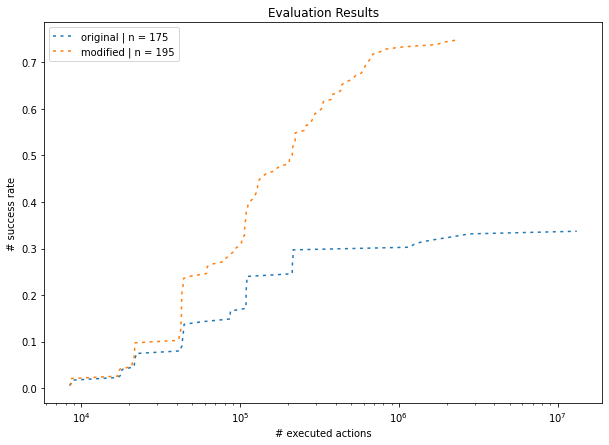

In [84]:
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(action_sr_pairs_original_df.actions
        , action_sr_pairs_original_df.cum_pct_sr
        , linestyle=':'
        , dashes=(2, 3)
        , label = f'original | n = {tot_exp_original }')

ax.plot(action_sr_pairs_modified_df.actions
        , action_sr_pairs_modified_df.cum_pct_sr
        , linestyle=':'
        , dashes=(2, 3)
        , label = f'modified | n = {tot_exp_modified }')

plt.ylabel('# success rate')
plt.xlabel('# executed actions')
plt.title('Evaluation Results')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()